# 1. Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


/tmp/ipykernel_39931/544872811.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('data/train.csv')

data.head()


,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [3]:
data  = data.drop(columns=['Customer ID','Name','Location','Property ID'], axis=1)
data.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,72809.58,241.08,N,N,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,113858.89,491.41,N,Y,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
data.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


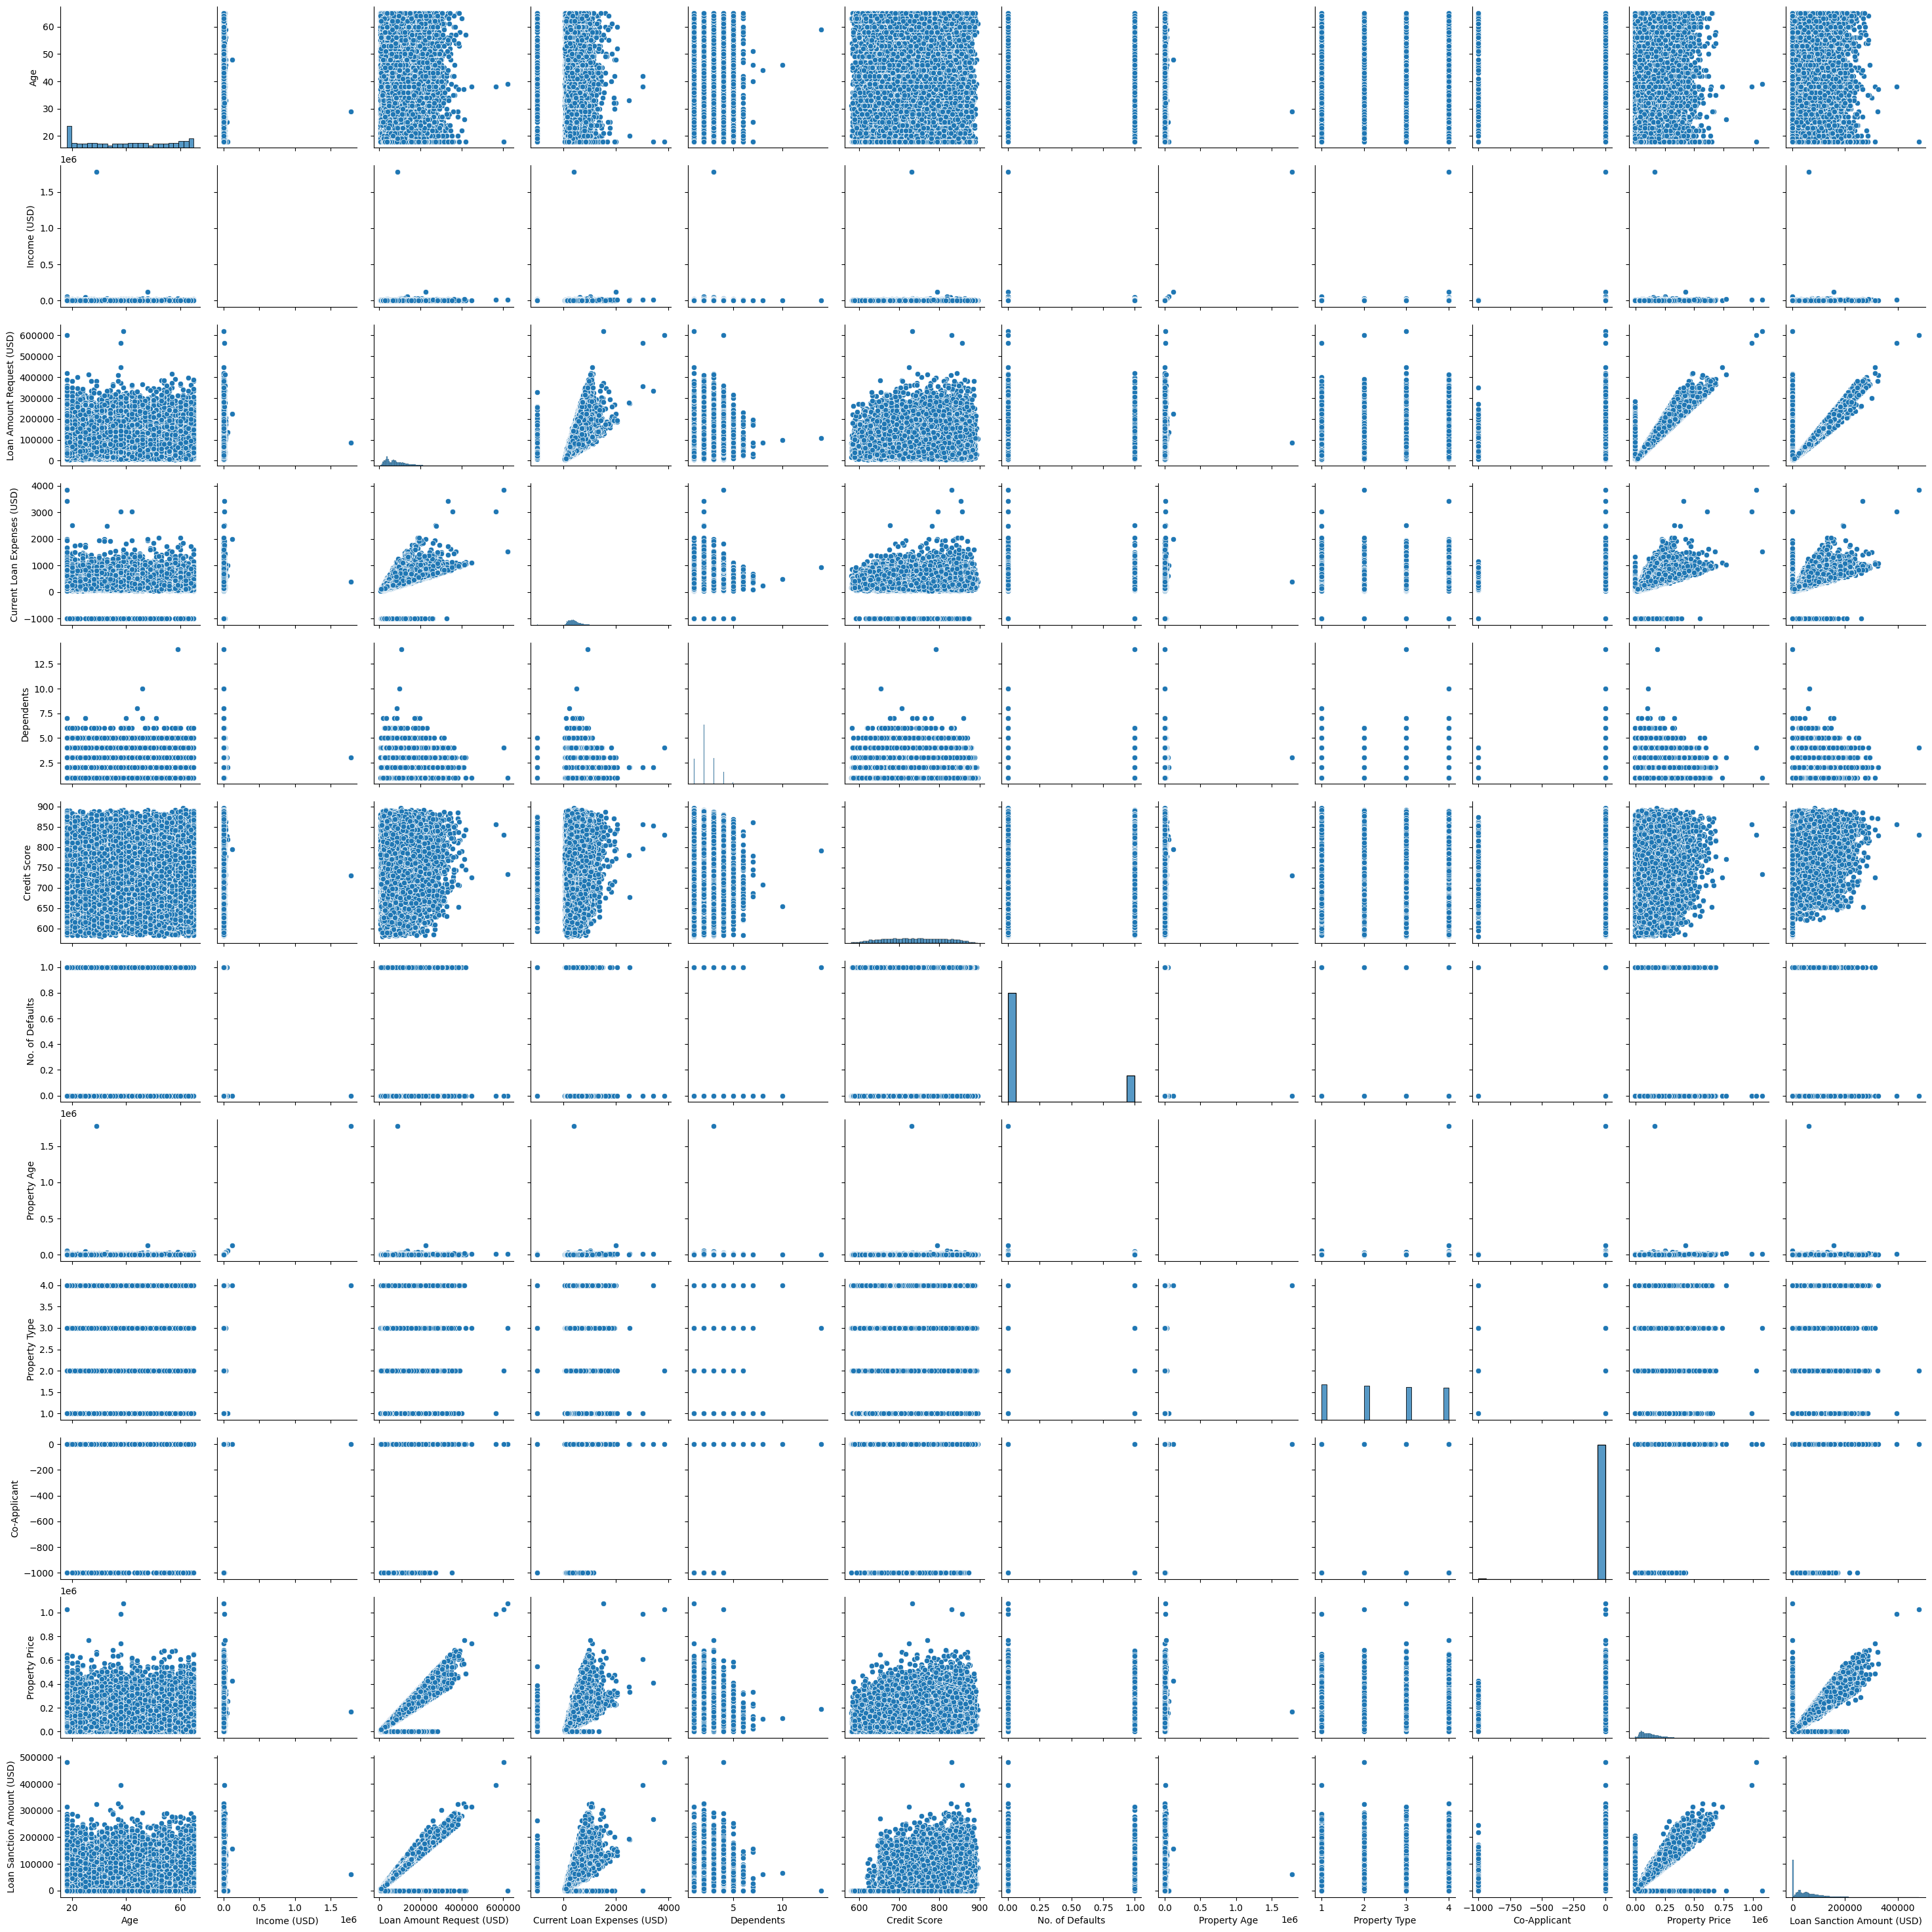

In [6]:
# 2. EDA  (this take 3 min)
# sns.pairplot(data)

# 2. Data Pre-Processing


## 2.1 Filling `Nan` values with `mean` values.


In [5]:
# Import pandas library
import pandas as pd

# Assuming 'data' is your DataFrame

# Handling missing values
data['Income (USD)'].fillna(data['Income (USD)'].median(), inplace=True)
data['Current Loan Expenses (USD)'].fillna(data['Current Loan Expenses (USD)'].median(), inplace=True)

# Handling zero or near-zero values
data.loc[data['Loan Amount Request (USD)'] == 0, 'Loan Amount Request (USD)'] = data['Loan Amount Request (USD)'].median()
data.loc[data['Property Price'] <= 1, 'Property Price'] = data['Property Price'].median()
data.loc[data['Loan Sanction Amount (USD)'] <= 1, 'Loan Sanction Amount (USD)'] = data['Loan Sanction Amount (USD)'].median()

# Filling missing values for Credit Score
data['Credit Score'].fillna(0, inplace=True)



data

/tmp/ipykernel_39340/1600280602.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income (USD)'].fillna(data['Income (USD)'].median(), inplace=True)
/tmp/ipykernel_39340/1600280602.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.050,Low,Working,Sales staff,72809.58,241.08,N,N,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.910,Low,Working,NaN,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.190,High,Pensioner,NaN,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,2222.435,High,Pensioner,NaN,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.770,Low,Working,High skill tech staff,113858.89,491.41,N,Y,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,38,4969.410,Low,Commercial associate,Managers,76657.90,722.34,Y,Y,2.0,869.61,0,Unpossessed,4969.41,4,Urban,1,111096.56,68992.11
29996,M,20,1606.880,Low,Working,Laborers,66595.14,253.04,N,N,3.0,729.41,0,Inactive,1606.88,3,Urban,1,73453.94,46616.60
29997,F,49,2222.435,Low,Working,Sales staff,81410.08,583.11,N,Y,NaN,0.00,0,Active,NaN,1,Rural,1,102108.02,61057.56
29998,M,38,2417.710,Low,Working,Security staff,142524.10,378.29,N,Y,3.0,677.27,1,Unpossessed,2417.71,4,Urban,1,168194.47,99766.87


## Encoding


In [6]:
data['Income Stability'] = data['Income Stability'].replace({'Low':0,"High":1})
data['Income Stability'].fillna(0, inplace=True)

data['Expense Type 1'] = data['Expense Type 1'].replace({'N':0,"Y":1})

data['Expense Type 1'].fillna(0, inplace=True)

data['Expense Type 2'] = data['Expense Type 2'].replace({'N':0,"Y":1})
print((data['Expense Type 2'] == 1).sum())
print((data['Expense Type 2'] == 0).sum())
data['Expense Type 2'].fillna(1, inplace=True)


20180
9820


/tmp/ipykernel_39340/3738224231.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Income Stability'] = data['Income Stability'].replace({'Low':0,"High":1})
/tmp/ipykernel_39340/3738224231.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income Stability'].fillna(0, inplace=True)
/tm

In [7]:
val = ()
val

()

In [8]:
cat_val = data.select_dtypes(include='object').columns
cat_val
ignore_cols = cat_val

data = data.dropna(subset=[col for col in data.columns if col not in ignore_cols])
data

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,0.0,Working,Sales staff,72809.58,241.08,0,0,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.180
1,M,32,4952.91,0.0,Working,NaN,46837.47,495.81,0,1,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.980
2,F,65,988.19,1.0,Pensioner,NaN,45593.04,171.95,0,1,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.430
5,F,60,1234.92,0.0,State servant,Secretaries,34434.72,181.48,0,0,2.0,684.12,1,Inactive,1234.92,2,Rural,1,43146.82,22382.570
6,M,43,2361.56,0.0,Working,Laborers,152561.34,697.67,1,1,2.0,637.29,0,Unpossessed,2361.56,1,Semi-Urban,1,221050.80,35209.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,M,39,2250.19,0.0,Commercial associate,Managers,83810.38,430.66,1,1,3.0,0.00,0,Inactive,2250.19,3,Urban,1,129028.33,62857.780
29995,M,38,4969.41,0.0,Commercial associate,Managers,76657.90,722.34,1,1,2.0,869.61,0,Unpossessed,4969.41,4,Urban,1,111096.56,68992.110
29996,M,20,1606.88,0.0,Working,Laborers,66595.14,253.04,0,0,3.0,729.41,0,Inactive,1606.88,3,Urban,1,73453.94,46616.600
29998,M,38,2417.71,0.0,Working,Security staff,142524.10,378.29,0,1,3.0,677.27,1,Unpossessed,2417.71,4,Urban,1,168194.47,99766.870


## 2.2 Detecting Outliers in `Income, Loan Sanction Amount, Loan Amount Request (USD),  `


In [9]:
def pltOutliersHistGraph(feature):
    plt.hist(data[feature])
    plt.show()
# Interquartile Range
def removeOutliersUsingIQR(feature):
    q1 = np.percentile(data[feature], 25)
    q3 = np.percentile(data[feature], 75)

    iqr = q3 - q1

    # quartile_deviation = (q3 - q1) / 2
    # print("Quartile Deviation:", quartile_deviation)

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print("Interquartile Range (IQR):", iqr)
    print("Lower Bound:",lower_bound)
    print("Upper Bound:", upper_bound)

    data_no_outliers = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    data_no_outliers.reset_index(drop=True, inplace=True)

    # Print the DataFrame without outliers
    return data_no_outliers

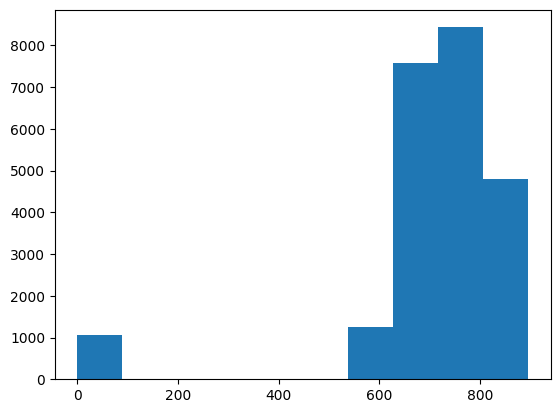

Interquartile Range (IQR): 123.05749999999989
Lower Bound: 488.1662500000002
Upper Bound: 980.3962499999998


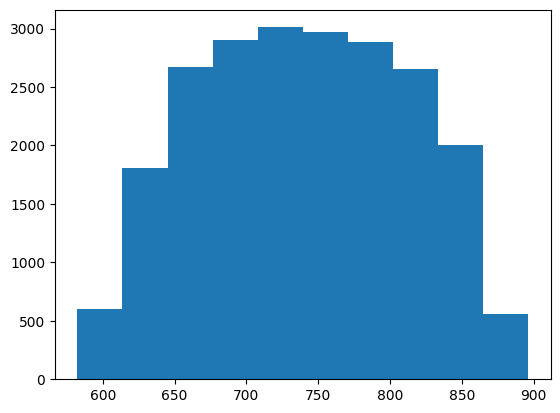

In [10]:
feature = 'Credit Score'
pltOutliersHistGraph(feature)
data = removeOutliersUsingIQR(feature)
pltOutliersHistGraph(feature)

In [11]:
# feature = 'Loan Sanction Amount (USD)'
# pltOutliersHistGraph(feature)
# data = removeOutliersUsingIQR(feature)
# pltOutliersHistGraph(feature)

In [12]:
# feature = 'Property Price'
# pltOutliersHistGraph(feature)
# data = removeOutliersUsingIQR(feature)
# pltOutliersHistGraph(feature)

In [13]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22073 entries, 0 to 22072
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       22034 non-null  object 
 1   Age                          22073 non-null  int64  
 2   Income (USD)                 22073 non-null  float64
 3   Income Stability             22073 non-null  float64
 4   Profession                   22073 non-null  object 
 5   Type of Employment           16765 non-null  object 
 6   Loan Amount Request (USD)    22073 non-null  float64
 7   Current Loan Expenses (USD)  22073 non-null  float64
 8   Expense Type 1               22073 non-null  int64  
 9   Expense Type 2               22073 non-null  int64  
 10  Dependents                   22073 non-null  float64
 11  Credit Score                 22073 non-null  float64
 12  No. of Defaults              22073 non-null  int64  
 13  Has Active Credi

# 2.3 Standardization and Normalization


In [14]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

loan_amount = data['Age'].values.reshape(-1, 1)

loan_amount_normalized = scaler.fit_transform(loan_amount)

data['Age'] = loan_amount_normalized.flatten()

/tmp/ipykernel_39340/2722009629.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = loan_amount_normalized.flatten()


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

loan_amount = data['Age'].values.reshape(-1, 1)

loan_amount_standardized = scaler.fit_transform(loan_amount)

data['Age'] = loan_amount_standardized.flatten()

# Data Transformation:
# data['Loan Sanction Amount (USD)'] = np.log1p(data['Loan Sanction Amount (USD)'])

/tmp/ipykernel_39340/3646321338.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = loan_amount_standardized.flatten()


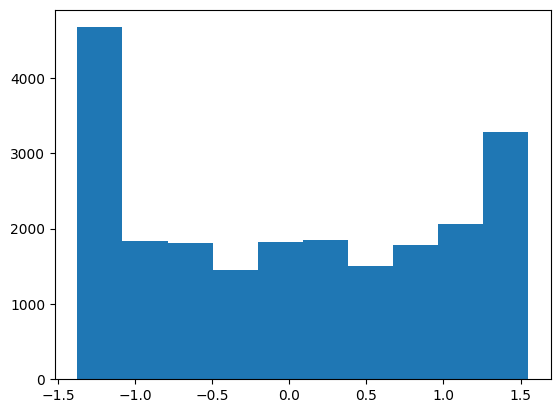

In [16]:
pltOutliersHistGraph('Age')

## 2.4 Data Encoding


![](https://ai-ml-analytics.com/wp-content/uploads/2021/02/Encoding-1.png)


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(data[['Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location']])

encoded_data = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location']))
encoded_data


,Gender_F,Gender_M,Gender_nan,Income Stability_0.0,Income Stability_1.0,Profession_Businessman,Profession_Commercial associate,Profession_Pensioner,Profession_State servant,Profession_Student,...,Expense Type 2_0,Expense Type 2_1,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Has Active Credit Card_nan,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban,Property Location_nan
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22068,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
22069,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
22070,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22071,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# 3. Feature selection


In [18]:
features = data[['Age','Loan Amount Request (USD)', 'Credit Score','Co-Applicant']]
label = data['Loan Sanction Amount (USD)']
features

,Age,Loan Amount Request (USD),Credit Score,Co-Applicant
0,0.990196,72809.58,809.44,1
1,-0.504144,46837.47,780.40,1
2,1.550574,45593.04,833.15,0
3,1.239253,34434.72,684.12,1
4,0.180762,152561.34,637.29,1
...,...,...,...,...
22068,-0.379616,141260.03,647.87,1
22069,-0.130559,76657.90,869.61,1
22070,-1.251315,66595.14,729.41,1
22071,-0.130559,142524.10,677.27,1


<Axes: >

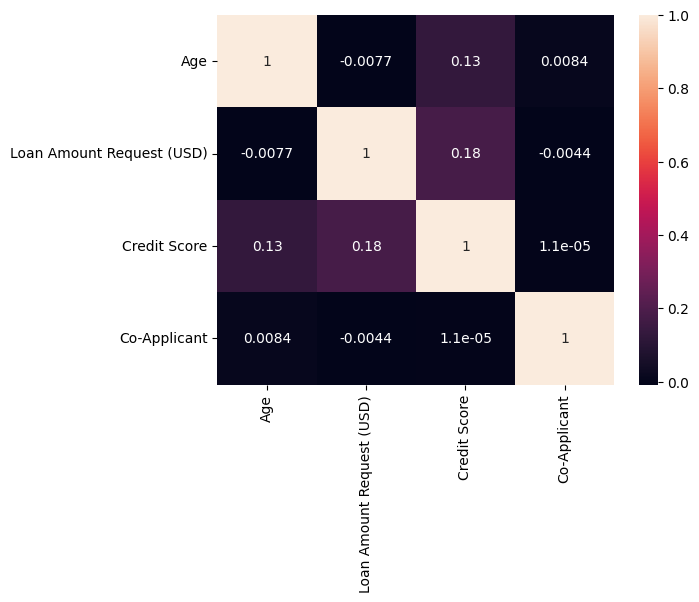

In [19]:
sns.heatmap(features.corr(),annot=True)

# 4 Mode Training


Mean Squared Error: 515517899.19603914
Coefficients: [-446.47214403    0.51117734   81.56098349   -4.1195555 ]
Intercept: -49699.21323461986
R-squared: 0.6815029930064648


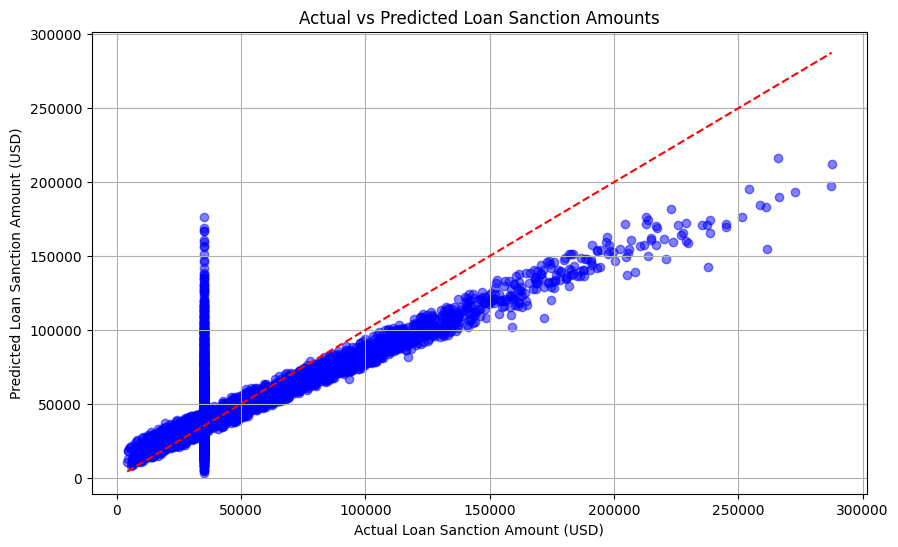

In [20]:
features = data[['Age','Loan Amount Request (USD)', 'Credit Score','Co-Applicant']]
label = data['Loan Sanction Amount (USD)']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Loan Sanction Amounts')
plt.xlabel('Actual Loan Sanction Amount (USD)')
plt.ylabel('Predicted Loan Sanction Amount (USD)')
plt.grid(True)
plt.show()
